# パラメータ付き確率分布は函数の一般化

パラメータ $x$ を持つ $y$ の確率質量函数 $P(y|x)$ やパラメータ $x$ を持つ $y$ の確率密度函数 $p(y|x)$ で決まる確率分布は函数 $y = f(x)$ の一般化とみなされる.  そのとき, 函数 $y = f(x)$ にぴったり対応する確率分布は各パラメータ値 $x$ ごとに値 $y = f(x)$ が生じる確率が $1$ になる布だと考えられる.  各パラメータ値 $x$ ごとに $y$ の値が確率的にしか決まらない場合がパラメータ $x$ を持つ確率分布になる.

パラメータ $x$ を持つ $y$ の確率密度函数 $p_1(y|x)$ とパラメータ $y$ を持つ $z$ の確率密度函数 $p_2(z|y)$ から,

$$
p(z|x) = \int p_2(z|y)p_1(y|x)\,dy
$$

で定義されたパラメータ $x$ を持つ $z$ の確率密度函数 $p(z|x)$ は函数の合成の一般化になっている.  $p(z|x)$ が定める確率分布に対応する乱数は, パラメータ値 $x$ に対して, まず確率密度函数 $p_1(y|x)$ が定める分布に従って乱数 $y$ を生成し, その次に確率密度函数 $p_2(z|y)$ が定める確率分布に従って生成された乱数 $z$ になる.  通常の函数の合成は値 $x$ から値 $y$ と値 $z$ が唯一つに決まる場合にちょうど対応しており, 値 $x$ から値 $y$ が, その値 $y$ から値 $z$ が確率的にしか決まらない場合が上の場合になる.  この段落では確率密度函数の場合を例に説明したが, 確率質量函数の場合も同様である.

In [1]:
using Distributions
using StatsFuns
using StatsPlots
default(fmt = :png, titlefontsize = 10, size = (400, 250))

## パラメータを持つ確率分布は函数の一般化である

In [2]:
function plot_distx(distfunc, x; L = 100, ma = 0.2, kwargs...)
    n = length(x)
    X = Matrix{Float64}(undef, n, L)
    Y = similar(X)
    Threads.@threads for j in 1:L
        for i in 1:n
            X[i,j] = x[i]
            Y[i,j] = rand(distfunc(x[i]))
        end
    end
    scatter(vec(X), vec(Y); ms=1.5, msw=0, ma, label="")
    plot!(; xlabel="x", ylabel="y")
    plot!(; size=(400, 340))
    plot!(; kwargs...)
end

plot_distx (generic function with 1 method)

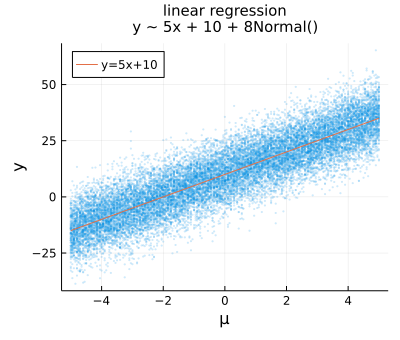

In [3]:
plot_distx(x -> 5x + 10 + 8Normal(), range(-5, 5, 201))
title!("linear regression\ny ∼ 5x + 10 + 8Normal()")
plot!(x -> 5x+10; label="y=5x+10", xlabel="μ", legend=:topleft)

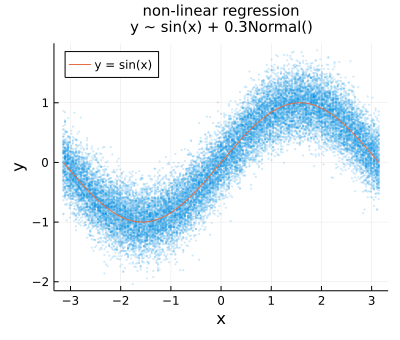

In [4]:
plot_distx(x -> sin(x) + 0.3Normal(), range(-π, π, 201))
title!("non-linear regression\ny ∼ sin(x) + 0.3Normal()")
plot!(x -> sin(x); label="y = sin(x)", legend=:topleft)

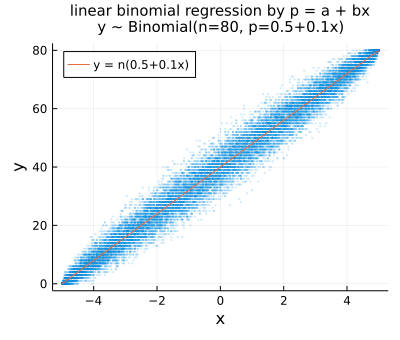

In [5]:
n = 80
plot_distx(x -> Binomial(n, 0.5+0.1x), range(-5, 5, 201))
title!("linear binomial regression by p = a + bx\ny ∼ Binomial(n=$n, p=0.5+0.1x)")
plot!(x -> n*(0.5+0.1x); label="y = n(0.5+0.1x)", legend=:topleft)

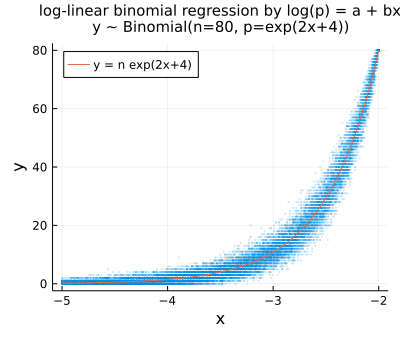

In [6]:
n = 80
plot_distx(x -> Binomial(n, exp(2x+4)), range(-5, -2, 201))
title!("log-linear binomial regression by log(p) = a + bx\ny ∼ Binomial(n=$n, p=exp(2x+4))")
plot!(x -> n*exp(2x+4); label="y = n exp(2x+4)", legend=:topleft)

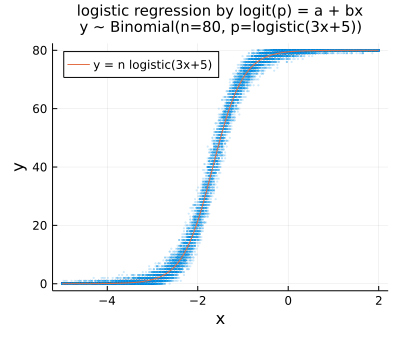

In [7]:
n = 80
plot_distx(x -> Binomial(n, logistic(3x+5)), range(-5, 2, 201))
title!("logistic regression by logit(p) = a + bx\ny ∼ Binomial(n=$n, p=logistic(3x+5))")
plot!(x -> n*logistic(3x+5); label="y = n logistic(3x+5)", legend=:topleft)

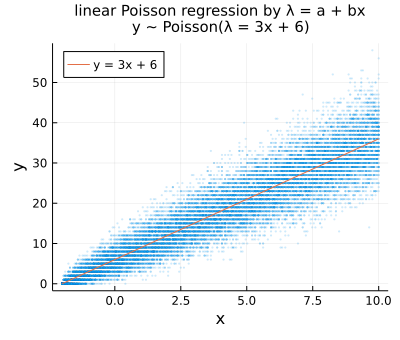

In [8]:
plot_distx(x -> Poisson(3x + 6), range(-2, 10, 201))
title!("linear Poisson regression by λ = a + bx\ny ∼ Poisson(λ = 3x + 6)")
plot!(x -> 3x + 6; label="y = 3x + 6", legend=:topleft)

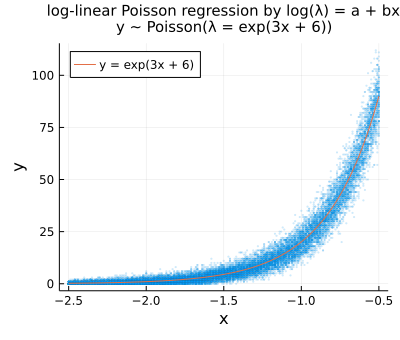

In [9]:
plot_distx(x -> Poisson(exp(3x+6)), range(-2.5, -0.5, 201))
title!("log-linear Poisson regression by log(λ) = a + bx\ny ∼ Poisson(λ = exp(3x + 6))")
plot!(x -> exp(3x + 6); label="y = exp(3x + 6)", legend=:topleft)

### 函数の合成のパラメータを持つ確率分布の場合の類似